In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


### Excercise 1:  Random  cooefficient ploynomial
Construct 4 randon numbers from normal distribution 
use them as cofficients for creating and plotting 4th degree polynomial

In [ ]:
# create 4 random cofficients from normal distribution
# mean of distribution 
mu = 0
# var of distribution
var = 1
nCoeff = 4
coeff_rand =  np.random.normal(loc=mu, scale=var, size=nCoeff)
print(coeff_rand)

x_min = -5
x_max = 5
# create x values
x = np.linspace(x_min, x_max,1000)
# equation to plot
y = coeff_rand[0] + coeff_rand[1]*x + coeff_rand[2]*x**2 + coeff_rand[3]*x**3
# create string for function name to  the title
fName = f'{coeff_rand[0]:.2f} + {coeff_rand[1]:.2f}x + {coeff_rand[2]:.2f}x^2 + {coeff_rand[3]:.2f}x^3'
# above shows up with + in between terms, e.g -.1 + -0.2x + -0.3x^2 , while this should look with +- as - .
# this is done below to create better string
fName = fName.replace('+ -', '- ')

In [3]:
def plot_polynomial(x,y,figsize, linestyle,xlabel,ylabel,funcName,x_min,x_max):
    #Specify figure size
    plt.figure(figsize=figsize)
    # specify plot line width
    plt.plot(x,y,linestyle=linestyle)
    # specify plot x and y labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # specify label and its location
    plt.title(funcName)
    # specify the limits for plotting
    plt.xlim(x_min,x_max)
    plt.ylim([np.min(y),np.max(y)])
    plt.grid()
    

### Excercise 2: redo Exercise 1 using for loop to make it more generic

In [ ]:
y_inloop = 0
# loop through the coefficients and create the equation : for all x, get corresponding y in one go, 
# but allows having any number of cofficients
# display equation also needs to be created on the go

fName_inloop = ''
for i,coeff in enumerate(coeff_rand):
    y_inloop = y_inloop + coeff*x**i   
    fName_inloop = fName_inloop + f' + {coeff:.2f}x^{i}'  
# check if the two arrays are equal
assert(np.allclose(y,y_inloop)) 
print(fName_inloop)
fName_inloop = fName_inloop.replace('+ -', '-')
print(fName_inloop)

In [ ]:
# plot first equation
figsize = (8,6)
linestyle = 'solid'
xlabel = 'x'
ylabel = 'y= f(x)'
funcName = fName
plot_polynomial(x,y,figsize, linestyle,xlabel,ylabel,funcName,x_min,x_max)

# plot second equation
funcName = fName_inloop
plot_polynomial(x,y_inloop,figsize, linestyle,xlabel,ylabel,funcName,x_min,x_max)

### Exercise 3: implement  sine wave with polynomials
$ \sin(x) = \sum_{n=1}^\infty (-1)^{n+1} \frac{x^{2n-1}}{(2n-1)!}$

In [ ]:
xmin = -6
xmax = 6
x = np.linspace(x_min, x_max,1001)
# create true y values
y_true = np.sin(x)
# implement Maclaurin series
y_MacSer = np.zeros(len(x))
# maximum n for sries
n_max = 10001 

for i,xi in enumerate(x):
    for n in range(1,n_max):
        term = (-1)**(n+1) * ((xi**(2*n-1)) / np.math.factorial(2*n-1))
        if abs(term) < 1e-15:  # Stop adding terms when they become negligible
            break
        y_MacSer[i] += term



In [ ]:
mseErr = np.mean((y_true - y_MacSer)**2)
print(f'Mean Squared Error: {mseErr:.2e}')


### Redo above for smaller n, displaying how the approximations look like

C:\Users\sidha\AppData\Local\Temp\ipykernel_17740\1674826437.py:26: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term = (-1)**(n + 1) * ((xi**(2 * n - 1)) / np.math.factorial(2 * n - 1))


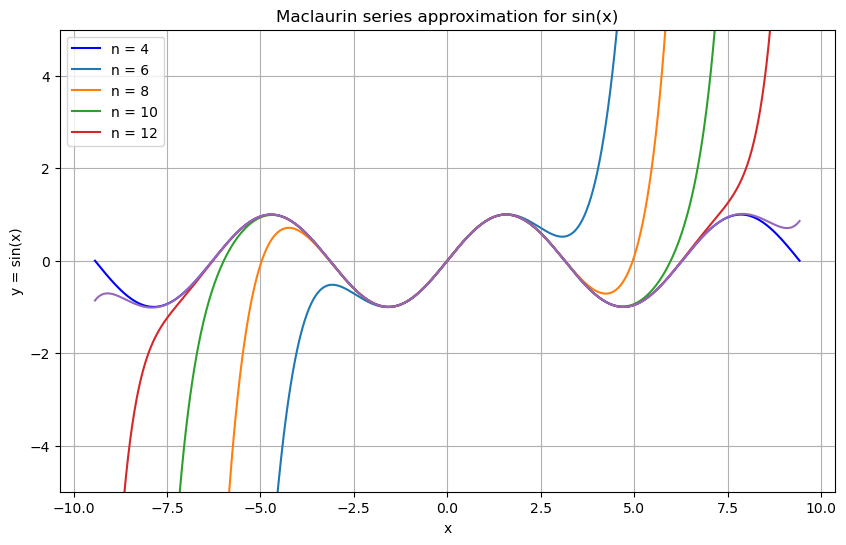

Mean Squared Error for various n: (11, array([1.97926835e+04, 3.02006721e+04, 1.87446503e+03, 1.29866464e+01,
       1.66576348e-02]))


In [9]:

import numpy as np
import matplotlib.pyplot as plt

# set x limits
xmin = -3 * np.pi
xmax = 3 * np.pi
x = np.linspace(xmin, xmax, 1001)  
# exact sin(x) values
y_true = np.sin(x)
#minimum and maximum n    
n_min = 4
n_max = 12
# number of points
n_points = 5
# range of n
n_range = np.linspace(n_min, n_max, n_points, dtype=int)
# initialize mean squared error array
mseErr = np.zeros(len(n_range))
cnt = 0
# create figure
plt.figure(figsize=(10, 6)) 
# initialize legend names
lgnd_nms = []
# Plot the true sin(x) outside the loop
plt.plot(x, y_true,'b-') 
# set limits for y axis( very Important as else smaller graphs get buried in the plot)
plt.ylim([-5,5])
# loop through the n(order) values
for nmax_Curr in n_range:
    y_MacSer = np.zeros(len(x))
    for i, xi in enumerate(x):
        # calculate the Maclaurin series
        for n in range(1, nmax_Curr):
            term = (-1)**(n + 1) * ((xi**(2 * n - 1)) / np.math.factorial(2 * n - 1))            
            y_MacSer[i] += term
    # note: no need to specify color, automatically picked by matplotlib
    plt.plot(x, y_MacSer)   
    mseErr[cnt] = np.mean((y_true - y_MacSer)**2)  
    # create legend names
    lgnd_nms = lgnd_nms + [f'n = {nmax_Curr}']  
    cnt += 1

# Correctly set the xlabel, ylabel, and title
plt.xlabel('x')  
plt.ylabel('y = sin(x)')  
plt.title('Maclaurin series approximation for sin(x)') 
plt.grid(True)
plt.legend(lgnd_nms)
plt.show()
print(f'Mean Squared Error for various n: {mseErr}')